# Clustering Based on Neural Networks in Wireless Sensor Networks

## 1. Using Random Points and Clustering with KMeans 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Generate random nodes for wsn
# We will assume that these points give out signals to the nodes

x1 = 10*np.random.rand(100,2)
print("x1 shape is",x1.shape)
print(x1)
# np.savetxt("rand_dataset.csv",x1,delimiter=",")

x1 shape is (100, 2)
[[3.57338157 4.03697936]
 [6.63206048 2.13867472]
 [3.58984138 3.28198035]
 [8.05746042 4.10019404]
 [0.63008121 6.4346263 ]
 [4.07515776 4.40808547]
 [5.91060792 4.68799476]
 [3.26351367 7.47286204]
 [3.25563505 9.69330173]
 [6.77184701 3.90985097]
 [5.69083694 1.0485965 ]
 [3.32165631 7.76393881]
 [8.17576122 6.3075311 ]
 [7.03448674 3.67058772]
 [2.82586902 0.46571705]
 [0.11491751 4.94455463]
 [9.39532057 2.04892877]
 [9.70793888 5.78973011]
 [3.12578593 1.36885425]
 [2.33417338 2.56526517]
 [4.79402869 5.42524779]
 [8.52371138 7.27623349]
 [0.72786037 0.14161135]
 [7.36484453 8.5171446 ]
 [6.72467872 5.61130106]
 [9.60615973 7.58391158]
 [5.64468372 4.69731955]
 [5.38546825 8.76517366]
 [8.13542018 4.10447848]
 [6.41768431 9.72176071]
 [9.79122679 1.52522305]
 [9.16022629 9.31255043]
 [8.36530111 1.19941747]
 [0.81513318 5.40745519]
 [0.87676791 5.80753874]
 [5.9026921  8.73507249]
 [0.14888825 8.57892466]
 [1.32588845 4.48747602]
 [0.02011744 5.78411089]
 [1.

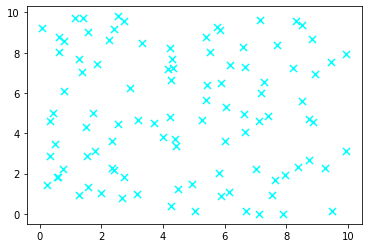

In [3]:
plt.scatter(
    x1[:,0],x1[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

In [4]:
#Here let us take 4 main nodes to which the signals are sent 
kmean = KMeans(n_clusters=3)
km = kmean
kmean.fit(x1) #Fitting our clusters using KMeans Algorithm

KMeans(n_clusters=3)

In [5]:
kmean.cluster_centers_

array([[4.09411413, 8.23643004],
       [7.66741707, 3.57192449],
       [2.3277698 , 2.79794881]])

In [6]:
y_km = kmean.labels_

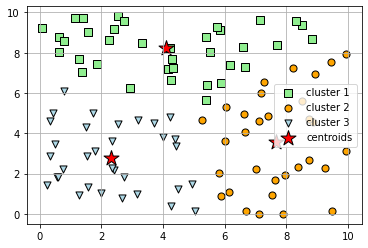

In [7]:
plt.scatter(
    x1[y_km == 0, 0], x1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x1[y_km == 1, 0], x1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x1[y_km == 2, 0], x1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

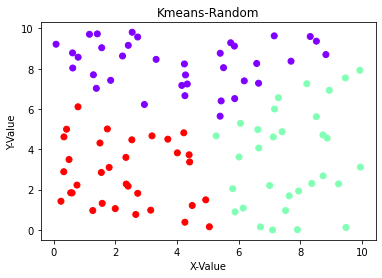

In [8]:
plt.scatter(x1[:,0],x1[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Random")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("kmeans_rand.jpg")
# plt.legend()  

Cluster 1 Inertia 1720.2969431077731
Cluster 2 Inertia 1026.1887877117845
Cluster 3 Inertia 656.3180428062656
Cluster 4 Inertia 387.34991866074245
Cluster 5 Inertia 312.5545784235567
Cluster 6 Inertia 257.40288929920825
Cluster 7 Inertia 215.38722684186698
Cluster 8 Inertia 173.78347302964212
Cluster 9 Inertia 148.71842591374795
Cluster 10 Inertia 136.19150261472456
Cluster 11 Inertia 124.15990926838101
Cluster 12 Inertia 111.46701650560239
Cluster 13 Inertia 104.66012129676884
Cluster 14 Inertia 91.25573663110353
Cluster 15 Inertia 86.68563265097842
Cluster 16 Inertia 79.72355403077755
Cluster 17 Inertia 71.3663151000254
Cluster 18 Inertia 68.23960860185353
Cluster 19 Inertia 61.04694880963729


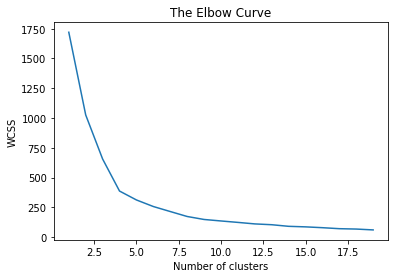

In [9]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x1)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

- The above plot tells us that 3 clusters are not appropriate enough due to the elbow forming after 3 and somewhere around 5 and the improvement becomes very less there after. So we need more nodes.